## Question 1: Cholesky and Gauss Siedel

In [1]:
import numpy as np # for printing matrix and vectors only for comparisons
from tabulate import tabulate # for printing matrix and vectors

%load_ext notexbook
%texify -v

In [2]:
def read_matrix_vector(filename):
    """Read the matrix and vector from a text file."""
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    matrix = []
    for line in lines[:-1]: 
        matrix.append([float(val) for val in line.strip().split()])
    
    vector = [float(val) for val in lines[-1].strip().split()]

    return matrix, vector

In [3]:
filename = 'q1_input.txt'
A, b = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))
print("\nVector:")
print(tabulate([b], tablefmt='fancy_grid'))

Matrix:
╒════╤════╤════╤════╤════╤════╕
│  4 │ -1 │  0 │ -1 │  0 │  0 │
├────┼────┼────┼────┼────┼────┤
│ -1 │  4 │ -1 │  0 │ -1 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  4 │  0 │  0 │ -1 │
├────┼────┼────┼────┼────┼────┤
│ -1 │  0 │  0 │  4 │ -1 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  0 │ -1 │  4 │ -1 │
├────┼────┼────┼────┼────┼────┤
│  0 │  0 │ -1 │  0 │ -1 │  4 │
╘════╧════╧════╧════╧════╧════╛

Vector:
╒═══╤═══╤═══╤═══╤═══╤═══╕
│ 2 │ 1 │ 2 │ 2 │ 1 │ 2 │
╘═══╧═══╧═══╧═══╧═══╧═══╛


In [4]:
def cholesky_decomposition(mat):
    """Perform Cholesky decomposition of a symmetric positive-definite matrix."""
    n = len(mat)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                L[i][i] = np.sqrt(mat[i][i] - sum(L[i][k] ** 2 for k in range(i)))
            else:
                L[i][j] = (mat[i][j] - sum(L[i][k] * L[j][k] for k in range(j))) / L[j][j]

    return L

L_cholesky = cholesky_decomposition(A)

print("\nL (Cholesky decomposition):")
print(tabulate(L_cholesky, tablefmt='fancy_grid'))


L (Cholesky decomposition):
╒══════╤═══════════╤════════════╤═════════════╤══════════╤════════╕
│  2   │  0        │  0         │  0          │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│ -0.5 │  1.93649  │  0         │  0          │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│  0   │ -0.516398 │  1.93218   │  0          │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│ -0.5 │ -0.129099 │ -0.0345033 │  1.93188    │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│  0   │ -0.516398 │ -0.138013  │ -0.554605   │  1.84572 │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│  0   │  0        │ -0.517549  │ -0.00924342 │ -0.58327 │ 1.8417 │
╘══════╧═══════════╧════════════╧═════════════╧══════════╧════════╛


In [5]:
def solve_system_cholesky_decomposition(A, b):
    """Solve a system of linear equations Ax = b using Cholesky decomposition."""
    L = cholesky_decomposition(A)
    y = forward_substitution(L, b)
    x = backward_substitution(L.T, y)
    return x

def forward_substitution(L, b):
    """Perform forward substitution to solve Ly = b."""
    n = len(b)
    y = np.zeros(n)

    for i in range(n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]

    return y

def backward_substitution(U, y):
    """Perform backward substitution to solve Ux = y."""
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i,i]

    return x

solution_cholesky = solve_system_cholesky_decomposition(A, b)
solution_numpy = np.linalg.solve(A, b)

data = [
    ["Solution using Cholesky decomposition"] + list(solution_cholesky),
    ["Solution using NumPy's solver"] + list(solution_numpy)
]

print("\nSolutions:")
print(tabulate(data, headers=["Method", "x1", "x2", "x3", "x4", "x5", "x6"], tablefmt="fancy_grid"))


Solutions:
╒═══════════════════════════════════════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Method                                │   x1 │   x2 │   x3 │   x4 │   x5 │   x6 │
╞═══════════════════════════════════════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ Solution using Cholesky decomposition │    1 │    1 │    1 │    1 │    1 │    1 │
├───────────────────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Solution using NumPy's solver         │    1 │    1 │    1 │    1 │    1 │    1 │
╘═══════════════════════════════════════╧══════╧══════╧══════╧══════╧══════╧══════╛


In [6]:
def dot_product(v1, v2):
    """Calculate the dot product of two vectors."""
    return sum(x * y for x, y in zip(v1, v2))

def truncate_number(number, decimal_places, round_off=False):
    """
    Truncate a number with or without rounding off.

    Args:
    number: The number to truncate.
    decimal_places: Number of decimal places to keep.
    round_off: Whether to round off or not. Default is True.

    Returns:
    truncated_number: Truncated number with or without rounding off.
    """
    factor = 10 ** decimal_places
    if round_off:
        truncated_number = round(number * factor) / factor
    else:
        truncated_number = int(number * factor) / factor
    return truncated_number

def gauss_seidel_iteration(A, b, x0, tol=1e-6, max_iter=1000):
    """Solve the system of linear equations Ax = b using Gauss-Seidel iterative method."""
    n = len(A)
    x = x0[:]
    convergence_table = []
    for iter_count in range(max_iter):
        for i in range(n):
            x[i] = (b[i] - dot_product(A[i][:i], x[:i]) - dot_product(A[i][i + 1:], x[i + 1:])) / A[i][i]
        convergence_table.append([iter_count + 1, x[:]])
        if max(abs(x[i] - x0[i]) for i in range(n)) < tol:
            break
        x0[:] = x
    return x, convergence_table

def solve_system_gauss_seidel(A, b, tol=1e-6, max_iter=1000, print_convergence=False, prescribed_tol=False):
    """Solve the system of linear equations Ax = b with prescribed precision using Gauss-Seidel method."""
    if prescribed_tol:
        tol = prescribed_tol
    x0 = [0] * len(b)  
    x, convergence_table = gauss_seidel_iteration(A, b, x0, tol=tol, max_iter=max_iter)
    
    truncated_convergence_table = []
    for iteration, solution in convergence_table:
        truncated_solution = [truncate_number(val, 6, round_off=False) for val in solution]
        truncated_convergence_table.append([iteration, truncated_solution])
    
    if print_convergence:
        print(tabulate(truncated_convergence_table, headers=["Iteration", "Solution"], tablefmt="fancy_grid"))
    return x

In [7]:
solution = solve_system_gauss_seidel(A, b, print_convergence=True)

╒═════════════╤══════════════════════════════════════════════════════════════╕
│   Iteration │ Solution                                                     │
╞═════════════╪══════════════════════════════════════════════════════════════╡
│           1 │ [0.5, 0.375, 0.59375, 0.625, 0.5, 0.773437]                  │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           2 │ [0.75, 0.710937, 0.871093, 0.8125, 0.824218, 0.923828]       │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           3 │ [0.880859, 0.894042, 0.954467, 0.926269, 0.936035, 0.972625] │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           4 │ [0.955078, 0.961395, 0.983505, 0.972778, 0.976699, 0.990051] │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           5 │ [0.983543, 0.985937, 0.993997, 0.99006, 0.991512, 0.996377]  │
├─────────────┼─────────────────────────────────────

## Question 2: Gauss Jordan and LU factorization

In [8]:
filename = 'q2_input.txt'
A, b = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))
print("\nVector:")
print(tabulate([b], tablefmt='fancy_grid'))

Matrix:
╒════╤═══╤═══╤════╤════╕
│  0 │ 4 │ 2 │  0 │  1 │
├────┼───┼───┼────┼────┤
│  4 │ 0 │ 4 │ 10 │  1 │
├────┼───┼───┼────┼────┤
│  2 │ 5 │ 1 │  3 │ 13 │
├────┼───┼───┼────┼────┤
│ 11 │ 3 │ 0 │  1 │  2 │
├────┼───┼───┼────┼────┤
│  3 │ 2 │ 7 │  1 │  0 │
╘════╧═══╧═══╧════╧════╛

Vector:
╒═══╤════╤════╤════╤═══╕
│ 0 │ 15 │ 92 │ 51 │ 1 │
╘═══╧════╧════╧════╧═══╛


In [9]:
def gauss_jordan_solve(mat, b, precision=6):
    """Solve a system of linear equations using Gauss-Jordan elimination."""
    n = len(mat)
    augmented_mat = [row + [bi] for row, bi in zip(mat, b)]

    for i in range(n):
        # Partial pivoting
        max_row = max(range(i, n), key=lambda k: abs(augmented_mat[k][i]))
        augmented_mat[i], augmented_mat[max_row] = augmented_mat[max_row], augmented_mat[i]

        # Division of pivot row
        pivot = augmented_mat[i][i]
        for j in range(i, n + 1):
            augmented_mat[i][j] /= pivot

        # Elimination loop
        for k in range(n):
            if k != i:
                factor = augmented_mat[k][i]
                for j in range(i, n + 1):
                    augmented_mat[k][j] -= factor * augmented_mat[i][j]

    solution = [truncate_number(row[n], precision) for row in augmented_mat]

    return solution

In [10]:
solution_gauss_jordan = gauss_jordan_solve(A, b)
solution_numpy = np.linalg.solve(A, b)
data = [
    ["Solution using Cholesky decomposition"] + list(solution_gauss_jordan),
    ["Solution using NumPy's solver"] + list(solution_numpy)
]

print("\nSolutions:")
print(tabulate(data, headers=["Method", "x1", "x2", "x3", "x4", "x5", "x6"], tablefmt="fancy_grid"))


Solutions:
╒═══════════════════════════════════════╤═════════╤══════════╤═════════╤═══════════╤═════════╕
│ Method                                │      x1 │       x2 │      x3 │        x4 │      x5 │
╞═══════════════════════════════════════╪═════════╪══════════╪═════════╪═══════════╪═════════╡
│ Solution using Cholesky decomposition │ 3.70806 │ -1.26088 │ -1.0463 │ -0.278316 │ 7.13612 │
├───────────────────────────────────────┼─────────┼──────────┼─────────┼───────────┼─────────┤
│ Solution using NumPy's solver         │ 3.70807 │ -1.26088 │ -1.0463 │ -0.278316 │ 7.13612 │
╘═══════════════════════════════════════╧═════════╧══════════╧═════════╧═══════════╧═════════╛


## Question 3: Conjugate Gradient 

In [11]:
from fractions import Fraction

def read_matrix_vector(filename):
    """Read the matrix and vector from a text file. Able to handle fractions."""
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    matrix = []
    for line in lines[:-1]: 
        line = line.strip().replace('−', '-')  
        matrix.append([float(val) for val in line.split()])
    
    vector = [Fraction(val) for val in lines[-1].strip().split()]  
    
    return np.array(matrix), np.array(vector, dtype=np.float64)

filename = 'q3_input.txt'
A, b = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))
print("\nVector:")
print(tabulate([b], tablefmt='fancy_grid'))

Matrix:
╒════╤════╤════╤════╤════╤════╕
│  2 │ -3 │  0 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┼────┤
│ -1 │  4 │ -1 │  0 │ -1 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  4 │  0 │  0 │ -1 │
├────┼────┼────┼────┼────┼────┤
│  0 │  0 │  0 │  2 │ -3 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  0 │ -1 │  4 │ -1 │
├────┼────┼────┼────┼────┼────┤
│  0 │  0 │ -1 │  0 │ -1 │  4 │
╘════╧════╧════╧════╧════╧════╛

Vector:
╒══════════╤══════════╤═══╤══════════╤═══════════╤═════════╕
│ -1.66667 │ 0.666667 │ 3 │ -1.33333 │ -0.333333 │ 1.66667 │
╘══════════╧══════════╧═══╧══════════╧═══════════╧═════════╛


In [13]:
def conjugate_gradient(A, b, precision):
    n = len(b)
    x = np.zeros(n)  
    r = b - np.dot(A, x)  
    p = r  

    while np.linalg.norm(r) > precision:
        Ap = np.dot(A, p)
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_next = r - alpha * Ap
        beta = np.dot(r_next, r_next) / np.dot(r, r)
        p = r_next + beta * p
        r = r_next

    return x

precision = 1e-6

numpy_solution = np.linalg.solve(A, b)
cg_solution = conjugate_gradient(A, b, precision)

data = [["NumPy Solver"] + list(numpy_solution),
        ["Conjugate Gradient Method"] + list(cg_solution)]

print(tabulate(data, headers=["Method", "x1", "x2", "x3", "x4", "x5"], tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════════╤══════════╤══════╤═══════════╤═════════════╤══════════╕
│                           │    Method │       x1 │   x2 │        x3 │          x4 │       x5 │
╞═══════════════════════════╪═══════════╪══════════╪══════╪═══════════╪═════════════╪══════════╡
│ NumPy Solver              │ -0.333333 │ 0.333333 │    1 │ -0.666667 │ 5.40108e-17 │ 0.666667 │
├───────────────────────────┼───────────┼──────────┼──────┼───────────┼─────────────┼──────────┤
│ Conjugate Gradient Method │ -0.333336 │ 0.333333 │    1 │ -0.666668 │ 1.64834e-07 │ 0.666668 │
╘═══════════════════════════╧═══════════╧══════════╧══════╧═══════════╧═════════════╧══════════╛


In [14]:
def conjugate_gradient_inverse(A, precision):
    n = A.shape[0]
    x = np.eye(n)  # Identity matrix
    r = np.dot(A, x) - np.eye(n)
    p = r

    while np.linalg.norm(r) > precision:
        Ap = np.dot(A, p)
        alpha = np.trace(np.dot(r.T, r)) / np.trace(np.dot(p.T, Ap))
        x = x - alpha * p
        r_next = np.dot(A, x) - np.eye(n)
        beta = np.trace(np.dot(r_next.T, r_next)) / np.trace(np.dot(r.T, r))
        p = r_next + beta * p
        r = r_next

    return x

def print_matrix(matrix, method):
    print(f"\n{method} Inverse Matrix:")
    print(tabulate(matrix, tablefmt="fancy_grid"))

In [15]:
# NumPy solution
numpy_inverse = np.linalg.inv(A)
print_matrix(numpy_inverse, "NumPy")

# Conjugate Gradient Method solution for inverse
cg_solution = conjugate_gradient_inverse(A, precision)
print_matrix(cg_solution, "Conjugate Gradient Method")


NumPy Inverse Matrix:
╒═══════════╤══════════╤══════════╤═══════════╤══════════╤══════════╕
│ 0.935065  │ 0.87013  │ 0.25974  │ 0.207792  │ 0.415584 │ 0.168831 │
├───────────┼──────────┼──────────┼───────────┼──────────┼──────────┤
│ 0.290043  │ 0.580087 │ 0.17316  │ 0.138528  │ 0.277056 │ 0.112554 │
├───────────┼──────────┼──────────┼───────────┼──────────┼──────────┤
│ 0.0865801 │ 0.17316  │ 0.320346 │ 0.0562771 │ 0.112554 │ 0.108225 │
├───────────┼──────────┼──────────┼───────────┼──────────┼──────────┤
│ 0.207792  │ 0.415584 │ 0.168831 │ 0.935065  │ 0.87013  │ 0.25974  │
├───────────┼──────────┼──────────┼───────────┼──────────┼──────────┤
│ 0.138528  │ 0.277056 │ 0.112554 │ 0.290043  │ 0.580087 │ 0.17316  │
├───────────┼──────────┼──────────┼───────────┼──────────┼──────────┤
│ 0.0562771 │ 0.112554 │ 0.108225 │ 0.0865801 │ 0.17316  │ 0.320346 │
╘═══════════╧══════════╧══════════╧═══════════╧══════════╧══════════╛

Conjugate Gradient Method Inverse Matrix:
╒═══════════╤══════════╤

## Question 4: Matrix inverison on a fly

In [19]:
import matplotlib.pyplot as plt

In [20]:
def k_delta(i, j):
    return 1 if i == j else 0

def matrix(i, j):
    num = 0.5 * (k_delta(i + 1, j) + k_delta(i - 1, j) - 2 * k_delta(i, j)) - m * m * k_delta(i, j)
    return num

def matrix_vector(v):
    Av = np.zeros_like(v)
    for i in range(N):
        ip = (i + 1) % N
        im = (i - 1) % N
        for j in range(N):
            jp = (j + 1) % N
            jm = (j - 1) % N
            Av[i, j] = (v[ip, j] + v[i, jp] + v[im, j] + v[i, jm] - 2 * v[i, j]) / (m ** 2) + 2 * v[i, j]
    return Av

def conjugate_gradient_inverse():
    x = np.random.rand(N, N)
    b = np.eye(N)
    r = b - matrix_vector(x)
    p = r.copy()
    rsold = np.sum(r * r)
    residue = []

    for i in range(N ** 2):
        ap = matrix_vector(p)
        alpha = rsold / np.sum(p * ap)
        x = x + alpha * p
        r = r - alpha * ap
        rsnew = np.sum(r * r)
        if np.sqrt(rsnew) < tolerance:
            print("Converged in", (i+1), "iterations.")
            break
        p = r + (rsnew / rsold) * p
        rsold = rsnew
        residue.append(np.sqrt(rsnew))

    return x, residue

In [21]:
N = 50
tolerance = 1e-6
m = 0.2

test = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        test[i][j] = matrix(i, j)
        
inverse, residue = conjugate_gradient_inverse()


Converged in 409 iterations.


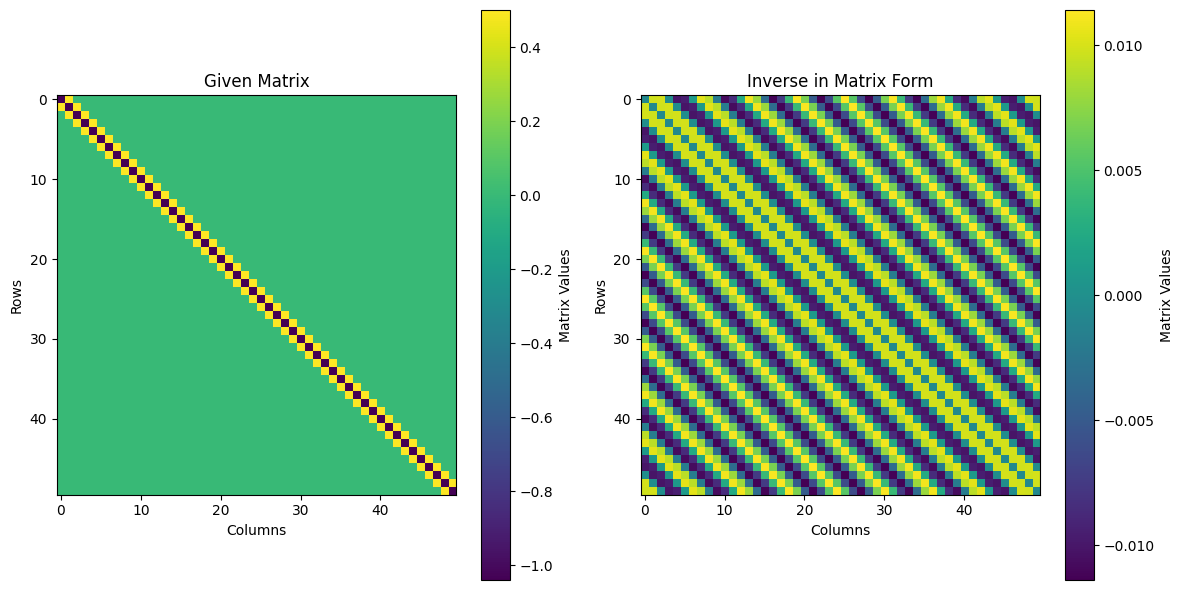

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# given matrix
ax1 = axes[0]
im1 = ax1.imshow(test, cmap='viridis')
ax1.set_title("Given Matrix")
ax1.set_xlabel("Columns")
ax1.set_ylabel("Rows")
plt.colorbar(im1, ax=ax1, label='Matrix Values')

# inverse matrix
ax2 = axes[1]
im2 = ax2.imshow(inverse, cmap='viridis')
ax2.set_title("Inverse in Matrix Form")
ax2.set_xlabel("Columns")
ax2.set_ylabel("Rows")
plt.colorbar(im2, ax=ax2, label='Matrix Values')

plt.tight_layout()
plt.show()

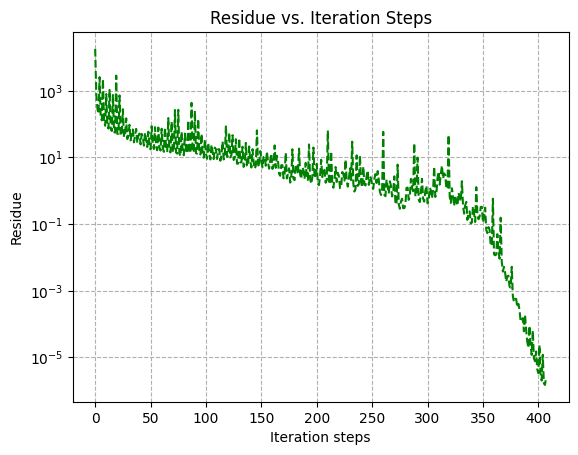

In [23]:
plt.plot(residue, color='green', linestyle='--')  # Using green color and dashed linestyle
plt.xlabel('Iteration steps')
plt.ylabel('Residue')
plt.title('Residue vs. Iteration Steps')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()